# Suicide Watch Veri Seti - Keşifsel Veri Analizi (EDA)

Bu notebook'ta Reddit'ten toplanan Suicide Watch veri setini analiz edeceğiz.

**Analiz İçeriği:**
1. Veri Yükleme ve Temel Bilgiler
2. Sınıf Dağılımı Görselleştirmeleri
3. Metin Uzunluk Analizleri
4. Word Cloud Görselleştirmeleri

## 1. Gerekli Kütüphanelerin İmport Edilmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## 2. Veri Yükleme ve Temel Bilgiler

In [2]:
df = pd.read_csv('../data/raw/Suicide_Detection.csv')
print("Veri seti başarıyla yüklendi!\n")
print("="*60)
print("İLK 5 SATIR:")
print("="*60)
df.head()

Veri seti başarıyla yüklendi!

İLK 5 SATIR:


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [3]:
print("="*60)
print("VERİ SETİ BİLGİLERİ")
print("="*60)
print(f"Satır Sayısı: {df.shape[0]:,}")
print(f"Sütun Sayısı: {df.shape[1]}")
print(f"\nSütunlar: {', '.join(df.columns)}")
print(f"\nBellek Kullanımı: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

VERİ SETİ BİLGİLERİ
Satır Sayısı: 232,074
Sütun Sayısı: 3

Sütunlar: Unnamed: 0, text, class

Bellek Kullanımı: 227.76 MB


In [4]:
print("\nVeri Tipleri:")
print(df.dtypes)
print("\nEksik Veri Kontrolü:")
print(df.isnull().sum())


Veri Tipleri:
Unnamed: 0     int64
text          object
class         object
dtype: object

Eksik Veri Kontrolü:
Unnamed: 0    0
text          0
class         0
dtype: int64


## 3. Sınıf Dağılımı Görselleştirmeleri

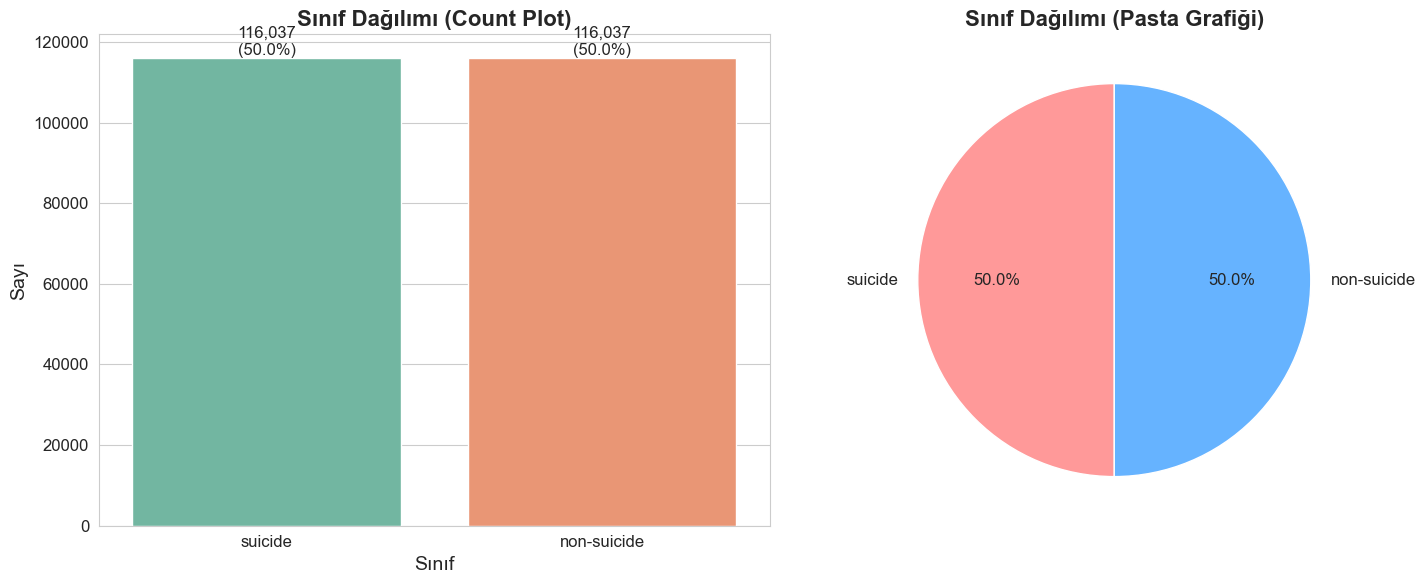


Sınıf Dağılımı Detayları:
suicide: 116,037 (50.00%)
non-suicide: 116,037 (50.00%)

✅ Veri seti DENGELİ! Sınıflar arasında önemli bir dengesizlik yok.


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax1 = axes[0]
sns.countplot(data=df, x='class', ax=ax1, palette='Set2')
ax1.set_title('Sınıf Dağılımı (Count Plot)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Sınıf', fontsize=14)
ax1.set_ylabel('Sayı', fontsize=14)

for i, patch in enumerate(ax1.patches):
    height = patch.get_height()
    ax1.text(patch.get_x() + patch.get_width()/2., height,
            f'{int(height):,}\n({height/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=12)

ax2 = axes[1]
class_counts = df['class'].value_counts()
colors = ['#ff9999', '#66b3ff']
ax2.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 12})
ax2.set_title('Sınıf Dağılımı (Pasta Grafiği)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nSınıf Dağılımı Detayları:")
print("="*40)
for class_name, count in class_counts.items():
    print(f"{class_name}: {count:,} ({count/len(df)*100:.2f}%)")
    
if abs(class_counts.values[0] - class_counts.values[1]) < len(df) * 0.05:
    print("\n✅ Veri seti DENGELİ! Sınıflar arasında önemli bir dengesizlik yok.")
else:
    print("\n⚠️ Veri setinde DENGESİZLİK var! Model eğitiminde dikkat edilmeli.")

## 4. Metin Uzunluk Analizi

In [6]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

print("Metin İstatistikleri:")
print("="*50)
print(f"Ortalama kelime sayısı: {df['word_count'].mean():.1f}")
print(f"Medyan kelime sayısı: {df['word_count'].median():.1f}")
print(f"En kısa metin: {df['word_count'].min()} kelime")
print(f"En uzun metin: {df['word_count'].max()} kelime")

Metin İstatistikleri:
Ortalama kelime sayısı: 131.9
Medyan kelime sayısı: 60.0
En kısa metin: 1 kelime
En uzun metin: 9684 kelime


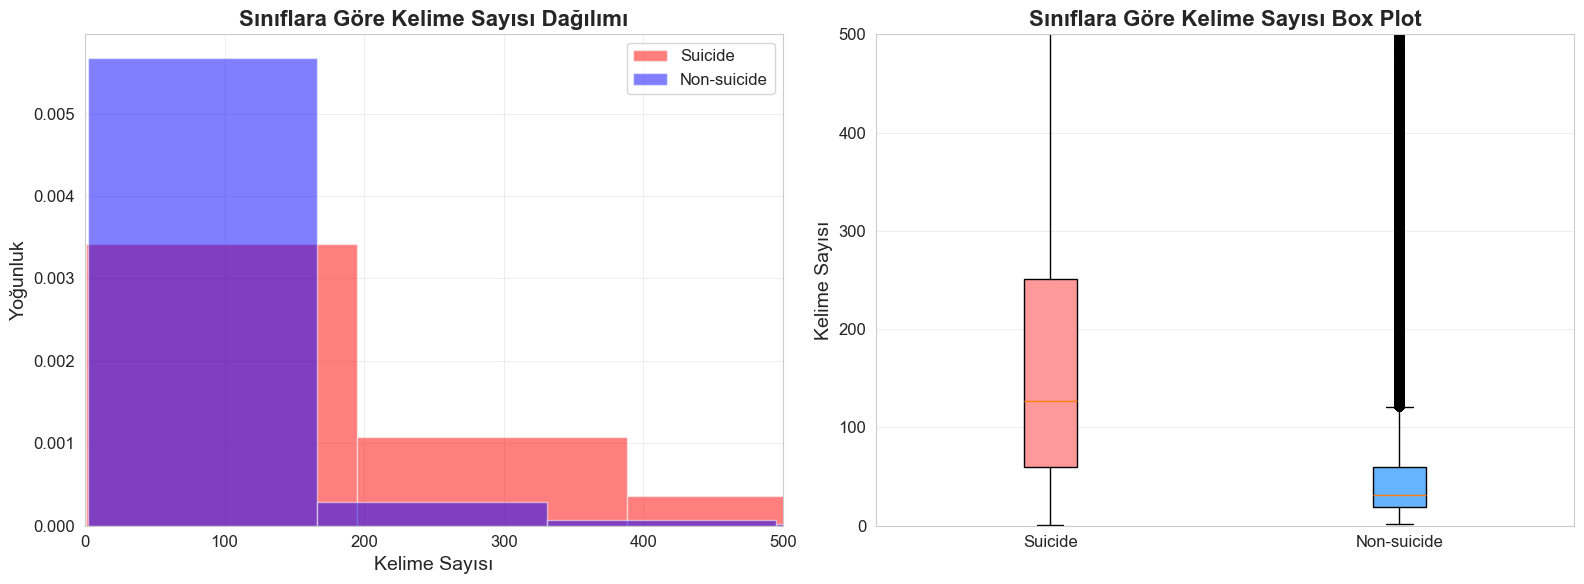


Sınıflara Göre İstatistikler:
Suicide sınıfı - Ortalama: 202.7, Medyan: 127.0
Non-suicide sınıfı - Ortalama: 61.2, Medyan: 31.0

📊 İntihar riski olan metinler ortalama olarak DAHA UZUN.


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
suicide_words = df[df['class'] == 'suicide']['word_count']
non_suicide_words = df[df['class'] == 'non-suicide']['word_count']

ax1.hist(suicide_words, bins=50, alpha=0.5, label='Suicide', color='red', density=True)
ax1.hist(non_suicide_words, bins=50, alpha=0.5, label='Non-suicide', color='blue', density=True)
ax1.set_xlabel('Kelime Sayısı', fontsize=14)
ax1.set_ylabel('Yoğunluk', fontsize=14)
ax1.set_title('Sınıflara Göre Kelime Sayısı Dağılımı', fontsize=16, fontweight='bold')
ax1.legend(loc='upper right', fontsize=12)
ax1.set_xlim(0, 500)
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
data_to_plot = [suicide_words, non_suicide_words]
bp = ax2.boxplot(data_to_plot, labels=['Suicide', 'Non-suicide'], patch_artist=True)
colors = ['#ff9999', '#66b3ff']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_ylabel('Kelime Sayısı', fontsize=14)
ax2.set_title('Sınıflara Göre Kelime Sayısı Box Plot', fontsize=16, fontweight='bold')
ax2.set_ylim(0, 500)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSınıflara Göre İstatistikler:")
print("="*50)
print(f"Suicide sınıfı - Ortalama: {suicide_words.mean():.1f}, Medyan: {suicide_words.median():.1f}")
print(f"Non-suicide sınıfı - Ortalama: {non_suicide_words.mean():.1f}, Medyan: {non_suicide_words.median():.1f}")

if suicide_words.mean() > non_suicide_words.mean():
    print("\n📊 İntihar riski olan metinler ortalama olarak DAHA UZUN.")
else:
    print("\n📊 İntihar riski olmayan metinler ortalama olarak DAHA UZUN.")

## 5. Word Cloud Görselleştirmeleri

Word Cloud oluşturuluyor (2000 rastgele örnek kullanılacak)...


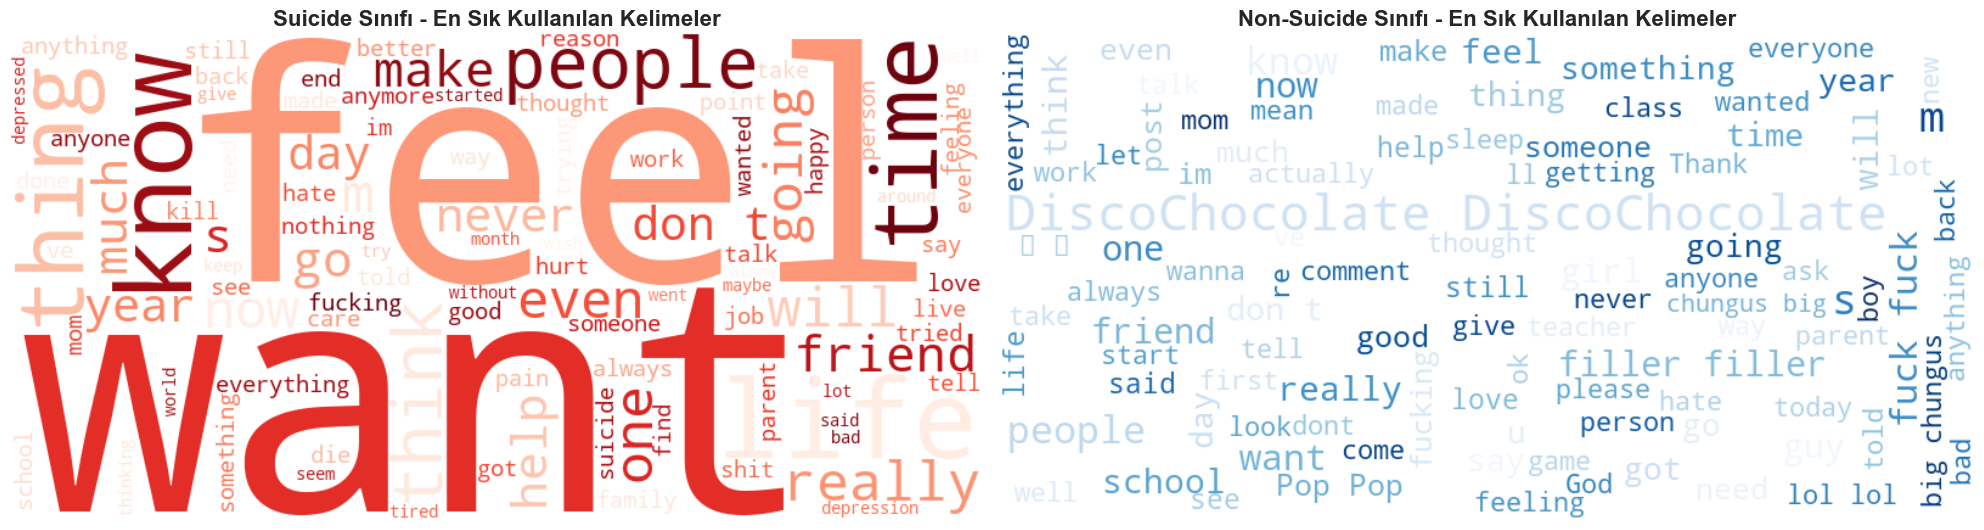


✅ Word Cloud'lar 2,000 örnek üzerinden oluşturuldu.


In [8]:
print("Word Cloud oluşturuluyor (2000 rastgele örnek kullanılacak)...")

sample_size = min(2000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

suicide_text = ' '.join(df_sample[df_sample['class'] == 'suicide']['text'].astype(str).tolist())
non_suicide_text = ' '.join(df_sample[df_sample['class'] == 'non-suicide']['text'].astype(str).tolist())

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

wordcloud_suicide = WordCloud(width=800, height=400, 
                              background_color='white',
                              colormap='Reds',
                              max_words=100).generate(suicide_text)
axes[0].imshow(wordcloud_suicide, interpolation='bilinear')
axes[0].set_title('Suicide Sınıfı - En Sık Kullanılan Kelimeler', fontsize=16, fontweight='bold')
axes[0].axis('off')

wordcloud_non_suicide = WordCloud(width=800, height=400, 
                                  background_color='white',
                                  colormap='Blues',
                                  max_words=100).generate(non_suicide_text)
axes[1].imshow(wordcloud_non_suicide, interpolation='bilinear')
axes[1].set_title('Non-Suicide Sınıfı - En Sık Kullanılan Kelimeler', fontsize=16, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ Word Cloud'lar {sample_size:,} örnek üzerinden oluşturuldu.")

## 6. En Sık Kullanılan Kelimeler (Top 20)

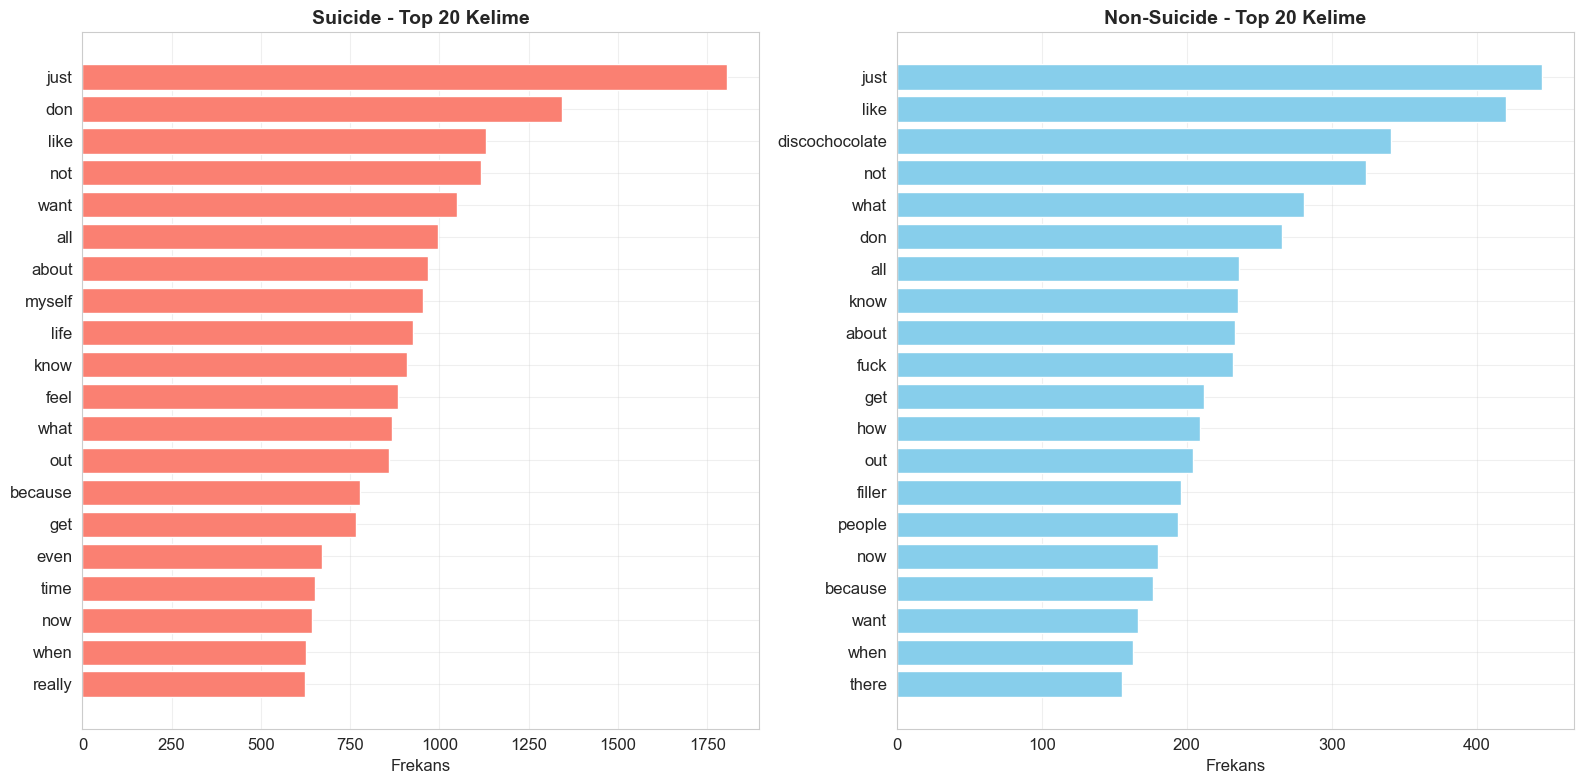

In [9]:
from collections import Counter
import re

def get_top_words(text_series, n=20):
    all_text = ' '.join(text_series.astype(str).tolist()).lower()
    words = re.findall(r'\b[a-z]+\b', all_text)
    
    stop_words = {'the', 'is', 'at', 'which', 'on', 'a', 'an', 'and', 'or', 'but', 
                 'in', 'with', 'to', 'for', 'of', 'as', 'from', 'by', 'that', 'this',
                 'it', 'i', 'you', 'he', 'she', 'we', 'they', 'them', 'their', 'my',
                 'your', 'our', 'me', 'him', 'her', 'us', 'be', 'been', 'being', 'have',
                 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should',
                 'may', 'might', 'must', 'can', 'am', 'are', 'was', 'were', 'so', 'if'}
    
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return Counter(words).most_common(n)

suicide_sample = df_sample[df_sample['class'] == 'suicide']['text']
non_suicide_sample = df_sample[df_sample['class'] == 'non-suicide']['text']

suicide_top = get_top_words(suicide_sample)
non_suicide_top = get_top_words(non_suicide_sample)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

words, counts = zip(*suicide_top)
axes[0].barh(range(len(words)), counts, color='salmon')
axes[0].set_yticks(range(len(words)))
axes[0].set_yticklabels(words)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frekans', fontsize=12)
axes[0].set_title('Suicide - Top 20 Kelime', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

words, counts = zip(*non_suicide_top)
axes[1].barh(range(len(words)), counts, color='skyblue')
axes[1].set_yticks(range(len(words)))
axes[1].set_yticklabels(words)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frekans', fontsize=12)
axes[1].set_title('Non-Suicide - Top 20 Kelime', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Özet ve Öneriler

In [10]:
print("="*60)
print("ÖZET VE ÖNERİLER")
print("="*60)
print("\n📊 VERİ SETİ ÖZETİ:")
print(f"- Toplam {len(df):,} metin örneği")
print(f"- Sınıf dağılımı dengeli ({class_counts.values[0]/len(df)*100:.1f}% - {class_counts.values[1]/len(df)*100:.1f}%)")
print(f"- Ortalama metin uzunluğu: {df['word_count'].mean():.0f} kelime")

print("\n🔍 ÖNEMLİ GÖZLEMLER:")
if suicide_words.mean() > non_suicide_words.mean():
    diff = ((suicide_words.mean() - non_suicide_words.mean()) / non_suicide_words.mean()) * 100
    print(f"- İntihar riski olan metinler %{diff:.1f} daha uzun")
else:
    diff = ((non_suicide_words.mean() - suicide_words.mean()) / suicide_words.mean()) * 100
    print(f"- İntihar riski olmayan metinler %{diff:.1f} daha uzun")

print("\n💡 MODEL GELİŞTİRME ÖNERİLERİ:")
print("1. Veri seti dengeli olduğu için class_weight kullanmaya gerek yok")
print("2. Metin uzunluğu model performansını etkileyebilir")
print("3. LSTM/GRU gibi sekans modelleri uygun görünüyor")
print("4. Word embedding (Word2Vec, GloVe) veya BERT kullanılabilir")
print("5. Cross-validation ile model performansı değerlendirilmeli")

print("\n✅ Analiz tamamlandı! Sonraki adım: Veri ön işleme ve model geliştirme.")

ÖZET VE ÖNERİLER

📊 VERİ SETİ ÖZETİ:
- Toplam 232,074 metin örneği
- Sınıf dağılımı dengeli (50.0% - 50.0%)
- Ortalama metin uzunluğu: 132 kelime

🔍 ÖNEMLİ GÖZLEMLER:


- İntihar riski olan metinler %231.2 daha uzun

💡 MODEL GELİŞTİRME ÖNERİLERİ:
1. Veri seti dengeli olduğu için class_weight kullanmaya gerek yok
2. Metin uzunluğu model performansını etkileyebilir
3. LSTM/GRU gibi sekans modelleri uygun görünüyor
4. Word embedding (Word2Vec, GloVe) veya BERT kullanılabilir
5. Cross-validation ile model performansı değerlendirilmeli

✅ Analiz tamamlandı! Sonraki adım: Veri ön işleme ve model geliştirme.
